## Loan Application Status Prediction
### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd 

# Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Machine Learning Tools 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


# Reading dataFrame

In [2]:
df = pd.read_csv('loan_prediction.csv')

# Checking the data overview

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Lets check the null values

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Dataset shape

In [7]:
df.shape

(614, 13)

# Dropping Unnecessary column

In [8]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [9]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Lets do some analysis on dataset

In [11]:
print(df[['Married', 'ApplicantIncome']].groupby('Married', as_index = False).median())

  Married  ApplicantIncome
0      No           3750.0
1     Yes           3854.5


Observation- Married prople has more income 

In [12]:
print(df[['Married', 'CoapplicantIncome']].groupby('Married', as_index = False).median())


  Married  CoapplicantIncome
0      No                0.0
1     Yes             1625.0


Observation- We see that people with no co-applicants are in most cases not married.

In [13]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
df[df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


### FIlling the data for married

In [15]:
df.loc[df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [16]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [17]:
df.isna().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Lets fill the null values for gender column

In [18]:
df['Loan_Status'] = df['Loan_Status'].map( {'Y' : 1, 'N' : 0} )

In [19]:
df[['Loan_Status', 'Gender']].groupby(['Gender']).mean()

,Loan_Status
Gender,
Female,0.669643
Male,0.693252


In [20]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
df[['Married', 'Gender', 'Loan_Status']].groupby(['Married'], as_index = False).mean()

,Married,Loan_Status
0,No,0.629108
1,Yes,0.718204


In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [23]:
df.isna().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Lets fill the null values for Dependent column

In [24]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df_dep_null=df.loc[df['Dependents'].isnull()]
df_dep_null

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1
104,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0


In [26]:
df[['Married', 'Dependents', 'ApplicantIncome']].groupby('Dependents').median()


,ApplicantIncome
Dependents,
0,3598.0
1,4051.5
2,4006.0
3+,4691.0


In [27]:
df[['Education', 'Dependents', 'Married']].groupby(['Dependents', 'Education'], as_index = False).count()

,Dependents,Education,Married
0,0,Graduate,275
1,0,Not Graduate,70
2,1,Graduate,81
3,1,Not Graduate,21
4,2,Graduate,77
5,2,Not Graduate,24
6,3+,Graduate,36
7,3+,Not Graduate,15


In [28]:
df[['Gender', 'Dependents', 'ApplicantIncome']].groupby(['Dependents', 'Gender'], as_index = False).median()

,Dependents,Gender,ApplicantIncome
0,0,Female,3413
1,0,Male,3676
2,1,Female,4608
3,1,Male,3988
4,2,Female,3427
5,2,Male,4088
6,3+,Female,1830
7,3+,Male,4731


In [29]:
df.loc[df['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1
104,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0


In [30]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [31]:
# For Males
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] < 3683.5) & (df['Gender'] == 'Male'),'Dependents'] = '0'
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] > 3683.5) & (df['ApplicantIncome'] <= 3931.5) & (df['Gender'] == 'Male'),'Dependents'] ='1'
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] > 3931.5) & (df['ApplicantIncome'] <= 4200.0) & (df['Gender'] == 'Male'),'Dependents'] ='2'
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] > 4200.0) & (df['Gender'] == 'Male'), 'Dependents'] = '3+'
    
# For Females 
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] < 3416.0) & (df['Gender'] == 'Female'), 'Dependents'] = '0'
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] > 4608.0) & (df['ApplicantIncome'] <= 4200) & (df['Gender'] == 'Female'),'Dependents'] = '1'
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] > 3427.0) & (df['ApplicantIncome'] <= 4608.0) & (df['Gender'] == 'Female'),'Dependents'] = '2'
df.loc[(df['Dependents'].isnull()) & (df['ApplicantIncome'] > 4200.0) & (df['Gender'] == 'Female'), 'Dependents'] = '3+'

df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

### Lets see the Self employed column and try to fill the missing data

In [33]:
df.loc[df['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,1
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,0
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,0
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,1
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,1


In [34]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

Observation- We can tell that if the person is not graduated then Self-Employed will be no 

In [35]:
df.loc[(df['Self_Employed'].isnull()) & (df['Education'] == 'Not Graduate'), 'Self_Employed'] = 'No'

In [36]:
df.loc[df['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,1
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,0
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,1
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,1
218,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,0


In [37]:
df[['ApplicantIncome', 'Self_Employed']].groupby('Self_Employed', as_index = False).median()


,Self_Employed,ApplicantIncome
0,No,3698
1,Yes,5809


Observation- We can fill the data by saying that Application Income greater than 5809 will be selfemployed and less than that will be not self emplyeed. 

In [38]:
df.loc[(df['Self_Employed'].isnull()) & (df['ApplicantIncome'] < 5809), 'Self_Employed'] = 'No'
df.loc[(df['Self_Employed'].isnull()) & (df['ApplicantIncome'] >= 5809), 'Self_Employed'] = 'Yes'

In [39]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Lets fill the Loan amount and loan term with median 

In [41]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [42]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Lets check the Credit history column and try to fill it

In [43]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [44]:
df['Credit_History'].dtypes

dtype('float64')

In [45]:
df.loc[df['Credit_History'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,1
24,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,0
30,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,0
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,1
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,1
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,0
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,1
95,Male,No,0,Graduate,Yes,6782,0.0,128.0,360.0,NaN,Urban,0
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,1
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,1


In [46]:
df[['ApplicantIncome', 'Credit_History']].groupby('Credit_History', as_index = False).median()


,Credit_History,ApplicantIncome
0,0.0,3547
1,1.0,3859


Observation- I will fill the data where Application income greater than 3859 will be 1.0 and lesser than that will be 0.0

In [47]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [48]:
df.loc[(df['Credit_History'].isnull()) & (df['ApplicantIncome'] >= 3859), 'Credit_History'] = 1.0
df.loc[(df['Credit_History'].isnull()) & (df['ApplicantIncome'] < 3859), 'Credit_History'] = 0.0


In [49]:
df['Credit_History'].unique()

array([1., 0.])

In [50]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Now the data filling has been done lets convert the data using encoder

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# EDA

<AxesSubplot:xlabel='Married', ylabel='count'>

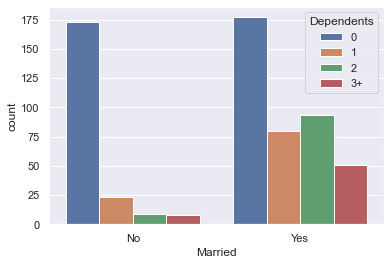

In [52]:
sns.countplot(df['Married'],hue=df['Dependents'])

Observation- Most of the married/un-maaried has 0 dependency.

<AxesSubplot:xlabel='Gender', ylabel='count'>

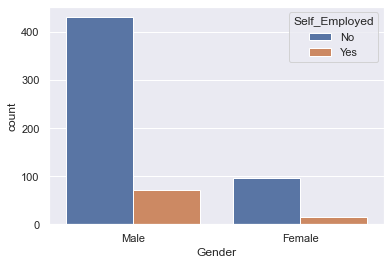

In [53]:
sns.countplot(df['Gender'],hue=df['Self_Employed'])

Observation- Most self employed person are Male 

<AxesSubplot:xlabel='Gender', ylabel='count'>

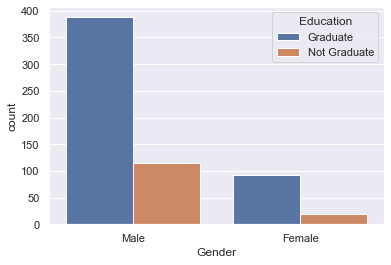

In [54]:
sns.countplot(df['Gender'],hue=df['Education'])

Observation- Most Males are graduated and most females are also graduated

<AxesSubplot:xlabel='Gender', ylabel='count'>

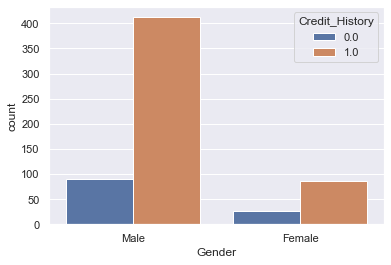

In [55]:
sns.countplot(df['Gender'],hue=df['Credit_History'])

Observation- Most Males and Females have credit history

<AxesSubplot:xlabel='Education', ylabel='count'>

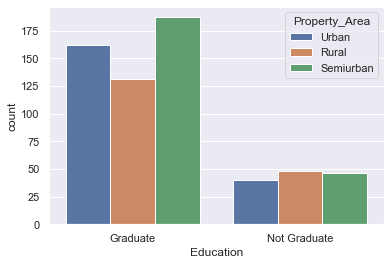

In [56]:
sns.countplot(df['Education'],hue=df['Property_Area'])

Observation- Most of the people are from Semi-urban area followed by urban area

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Gender'>

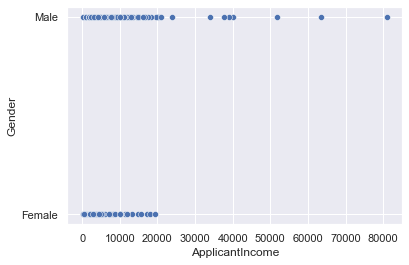

In [57]:
sns.scatterplot(df['ApplicantIncome'],df['Gender'])


Observation- Males are having more income as an average than females

## Plotting Scatter plot to check features vs label

## Seperating features and label

In [60]:
y= df['Loan_Status']
x= df.drop(['Loan_Status'], axis =1)

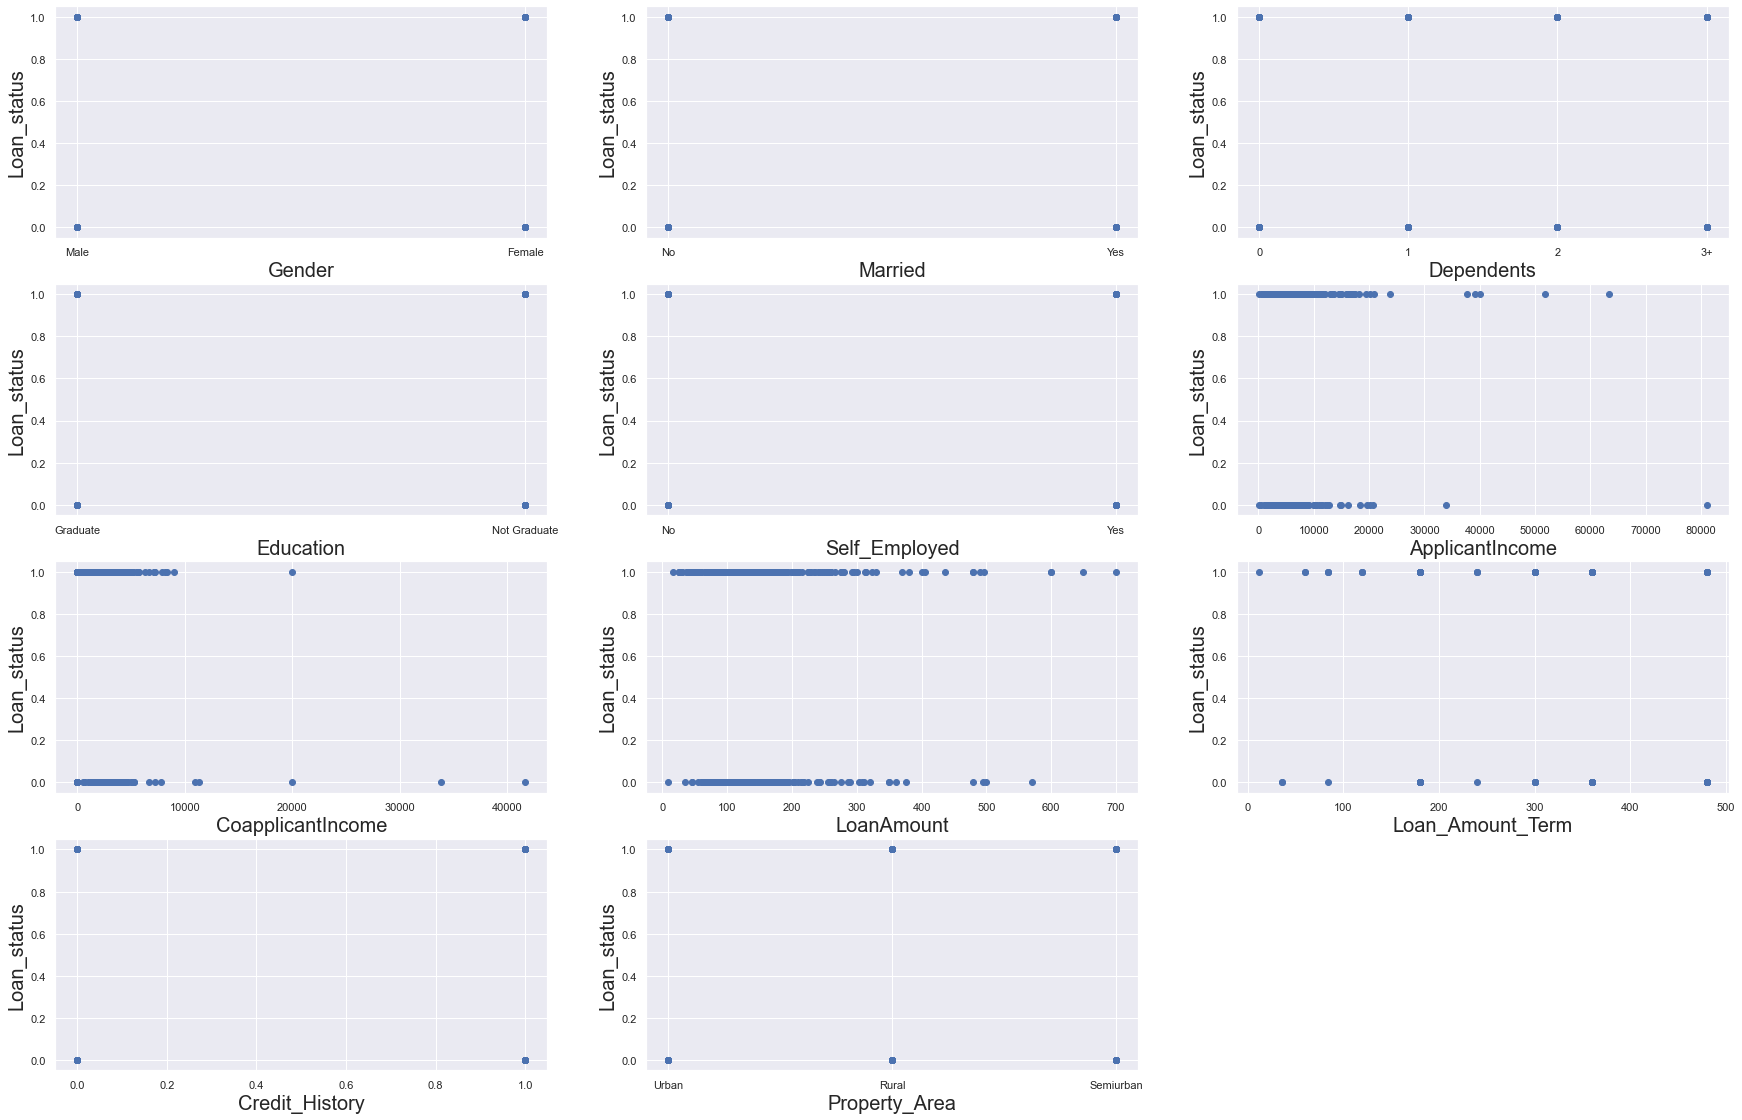

In [61]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in x:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Loan_status',fontsize=20)
    plotnumber +=1
plt.show()

# Label Encoder to convert the dataset to numerical

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [64]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

# Normal Distribution

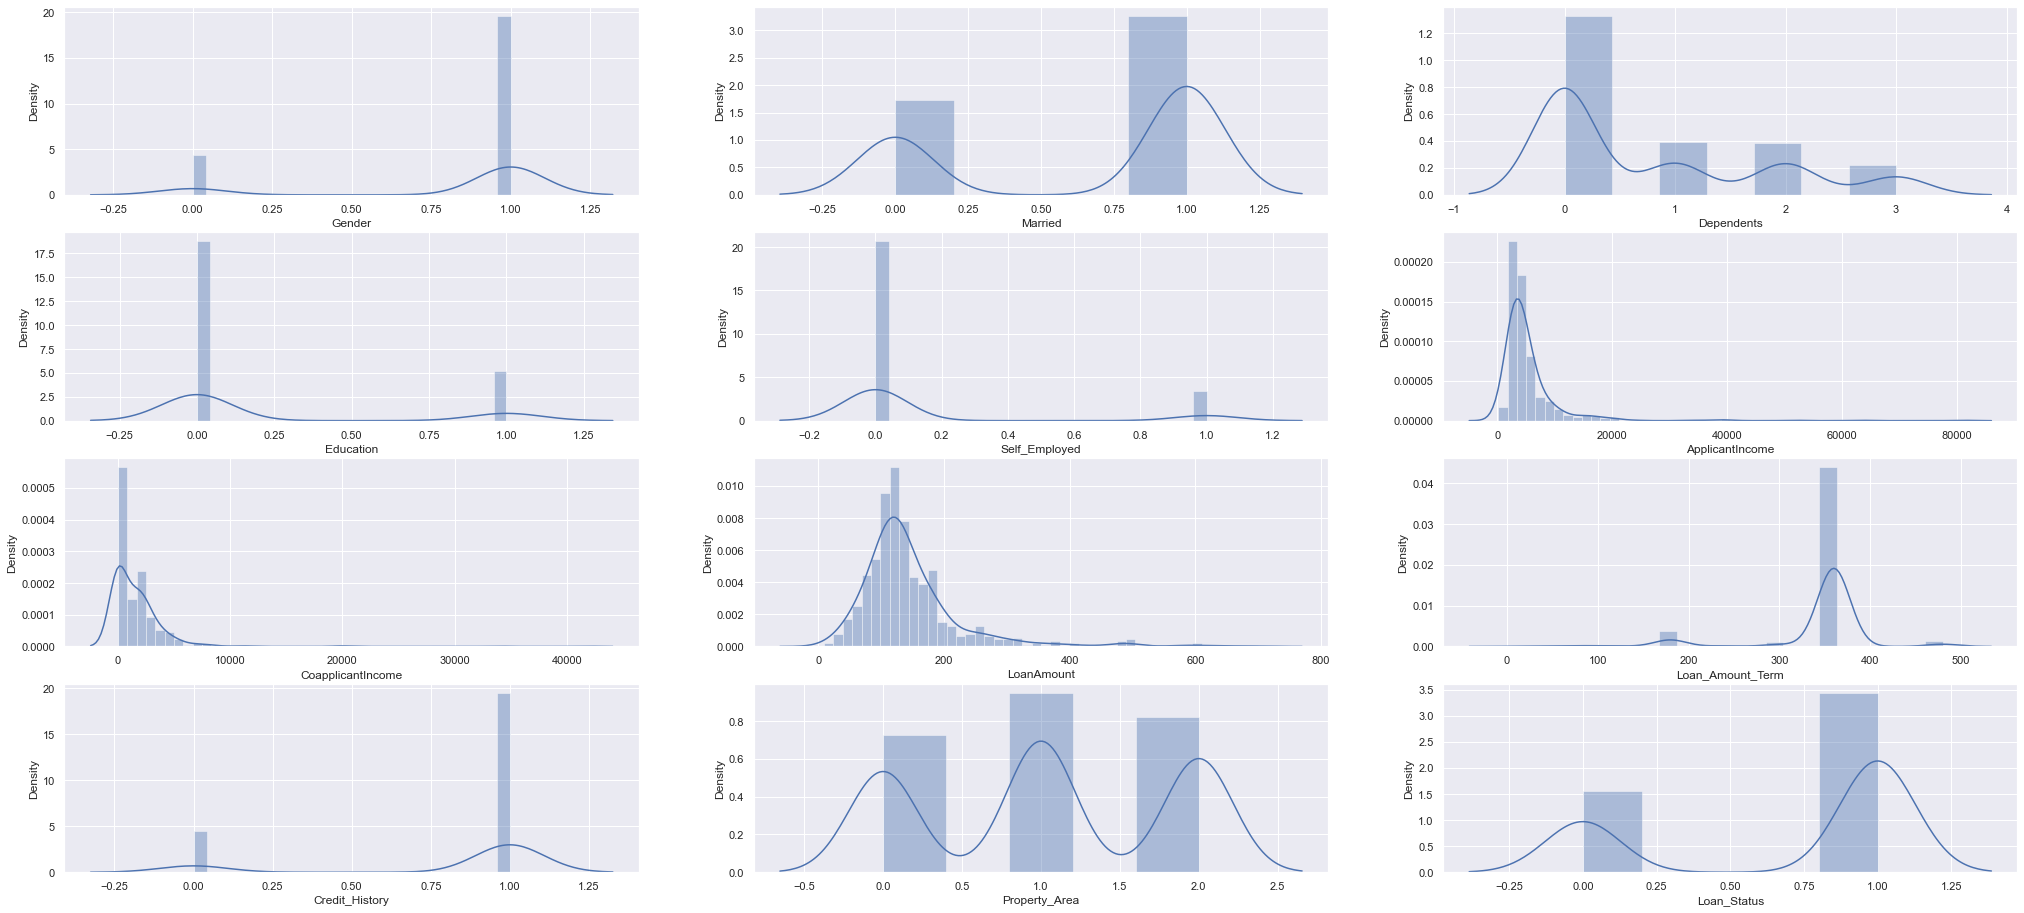

In [65]:
plt.figure(figsize=(35,45))
plotnumber =1

for column in df:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column) 
    plotnumber+=1
plt.show()

# Lets Check the correlation 

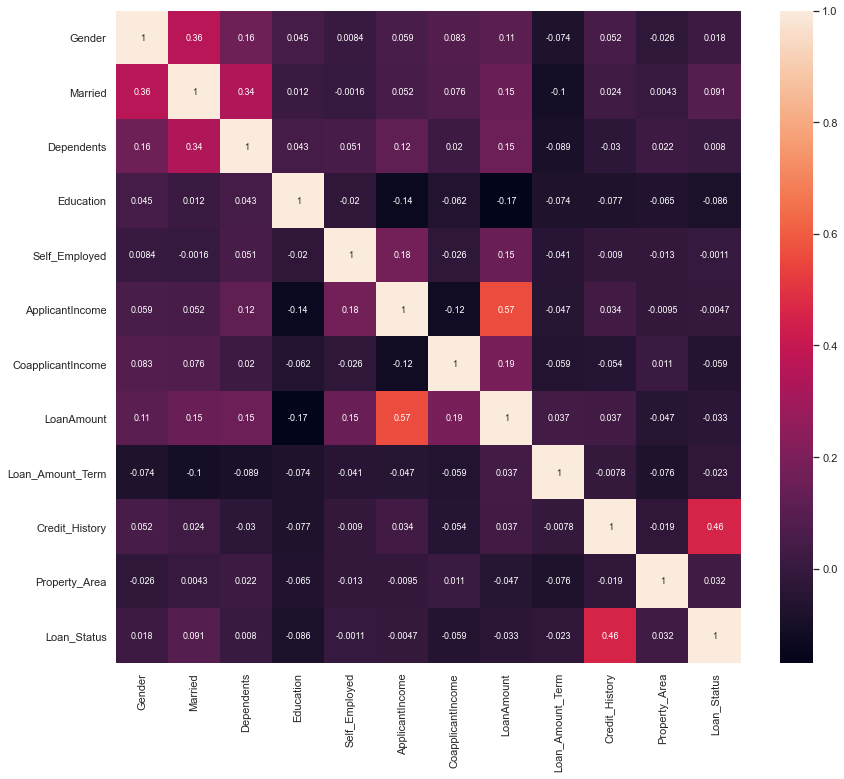

In [66]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 9})
plt.show()

Observation- 
- LoanAmount and Apllication income is 57% correlated
- Loan_status and Credit_history is 46% correlated
- Dependents and married is 34 % correlated

# Checking the Skewness

In [67]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.950254
Education            1.367622
Self_Employed        2.079309
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -1.593245
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observation- Setting the range of skewness in -0.5 to +0.5
- Gender, Loan_amount_term, Credit_history and Loan status is negatively skewed
- Dependents, Education, Self_Employeed, Application_income, CoapplicationIncome,LoanAmount is postively skewed

### Lets try to remove skewness 

In [68]:
features = df.drop('Loan_Status', axis=1)
label = df['Loan_Status']

# Removing skewness-


In [69]:
df.shape

(614, 12)

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

- log1p is reverse of exp(x) – 1

In [70]:
for col in features:
    if df.skew().loc[col]>0.50:
        df[col] = np.log1p(df[col])

In [71]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.610043
Education            1.367622
Self_Employed        2.079309
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -1.593245
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observation- Skewness has been reduced

In [72]:
df.shape

(614, 12)

# Using Boxplot to check the outliers

Gender                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Married              AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Dependents           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education               AxesSubplot(0.125,0.593621;0.227941x0.130172)
Self_Employed        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
ApplicantIncome      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
CoapplicantIncome       AxesSubplot(0.125,0.437414;0.227941x0.130172)
LoanAmount           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Loan_Amount_Term     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Credit_History          AxesSubplot(0.125,0.281207;0.227941x0.130172)
Property_Area        AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Loan_Status          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

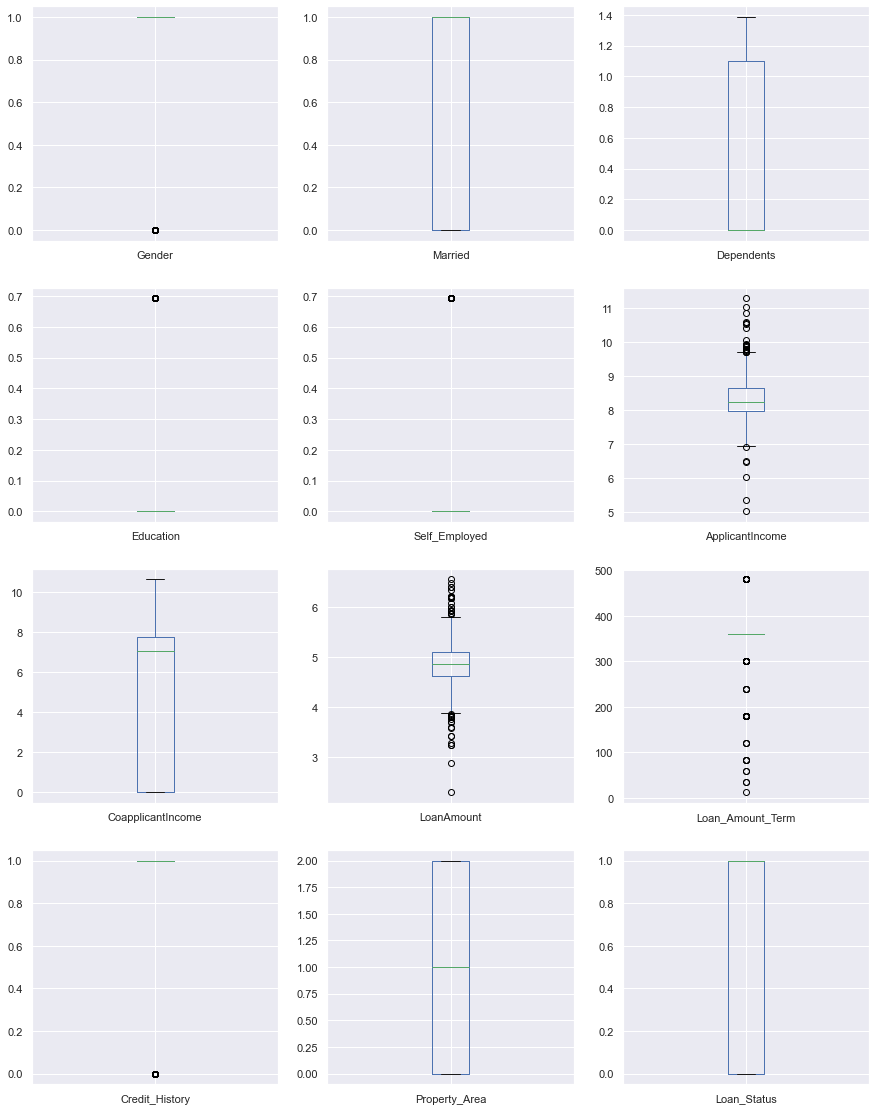

In [73]:
df.plot(kind='box',subplots=True, layout=(5,3),figsize=(15,25))

Observation-
- Gender, Married, Dependents, Eduction,Self_employed,Credit_history,Property area are categorical data are we can ignore the skwness and outliers for these columns
- Application Income has outliers present 
- Loan amount has outliers present
- CoapplicantIncome  has outliers present

# Removing Outliers:

In [74]:
df.shape

(614, 12)

In [75]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(614, 12)

In [76]:
threshold =3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([7, 8, 8, 7, 8, 7, 7, 8, 5, 7, 5, 7, 5, 5, 5, 8, 8, 8, 5, 7, 5, 5,
       5, 8, 8, 8, 7, 7, 7, 8, 8, 5], dtype=int64))


In [77]:
df_new_z=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new_z.shape)

(614, 12)
(587, 12)


# Data loss after Zscore

In [78]:
loss_percentage=(614-587)/614*100
print(loss_percentage)

4.397394136807818


Observation- After zscore outlier removal we have loss 4.3% of data loss

Gender                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Married              AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Dependents           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education               AxesSubplot(0.125,0.593621;0.227941x0.130172)
Self_Employed        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
ApplicantIncome      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
CoapplicantIncome       AxesSubplot(0.125,0.437414;0.227941x0.130172)
LoanAmount           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Loan_Amount_Term     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Credit_History          AxesSubplot(0.125,0.281207;0.227941x0.130172)
Property_Area        AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Loan_Status          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

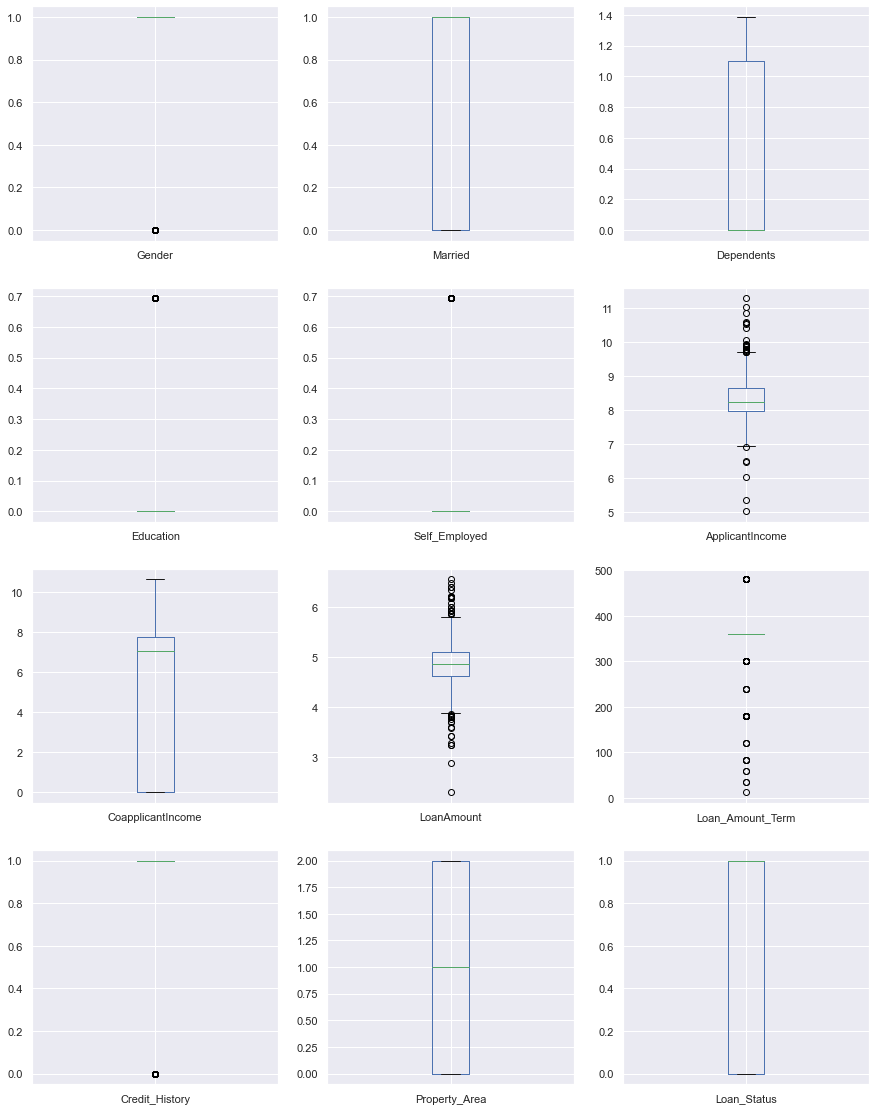

In [79]:
df.plot(kind='box',subplots=True, layout=(5,3),figsize=(15,25))

# Scalling the data and creating ML

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [81]:
X1 = df_new_z.drop('Loan_Status', axis=1)
y1 = df_new_z['Loan_Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=0)

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  77.11864406779661
[[16 21]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.73      0.43      0.54        37
           1       0.78      0.93      0.85        81

    accuracy                           0.77       118
   macro avg       0.75      0.68      0.69       118
weighted avg       0.76      0.77      0.75       118



## Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  67.79661016949152
[[19 18]
 [20 61]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        37
           1       0.77      0.75      0.76        81

    accuracy                           0.68       118
   macro avg       0.63      0.63      0.63       118
weighted avg       0.68      0.68      0.68       118



## Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  73.72881355932203
[[16 21]
 [10 71]]
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        37
           1       0.77      0.88      0.82        81

    accuracy                           0.74       118
   macro avg       0.69      0.65      0.66       118
weighted avg       0.72      0.74      0.72       118



## SVC

In [85]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  76.27118644067797
[[15 22]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        37
           1       0.77      0.93      0.84        81

    accuracy                           0.76       118
   macro avg       0.74      0.67      0.68       118
weighted avg       0.75      0.76      0.74       118



# Cross Validation

### Logistic Regression

In [86]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X_scaled,y1,cv=5)
print("Cross validation score of Logistic  model :", scr.mean())

Cross validation score of Logistic  model : 0.7836882514848617


### Random Forest

In [87]:
scr = cross_val_score(rf,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.7581341445748226


### SVC 

In [88]:
scr = cross_val_score(svc,X_scaled,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.7802549616108937


Observation- Logistic regression has highest accuracy followed by SVC model

# Hyper Parameter Tuning

### Random Forest

In [89]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [2,3,4,5,6,7,8,9,10],
             'criterion': ['gini','entropy']}

In [90]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) 
GCV.best_params_


{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}

In [91]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7711864406779662

###  SVC

In [92]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [93]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [94]:
grid_pred= grid.best_estimator_.predict(x_test)
accuracy_score(y_test,grid_pred)

0.7711864406779662

# ROC AUC Plot

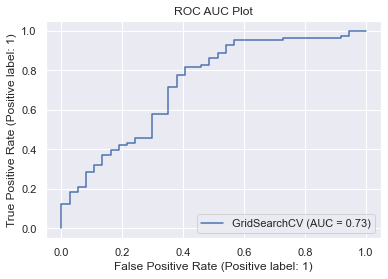

In [95]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Conclusion

In [96]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com

,Original,Predicted
0,1,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
113,0,1
114,1,1
115,1,1
116,1,1


# Saving the model

In [97]:
import pickle
filename = 'Loan_application_pickle_model.pkl'
pickle.dump(GCV.best_params_,open(filename, 'wb'))